<a href="https://colab.research.google.com/github/JorgeLuizFranco/MultiObjectiveHungerAnalysis/blob/main/distribution_Damicore_comparison_dadosFome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import files
import os


# Handy function to report errors.

def fault(msg):
  raise ValueError(msg)

# Mount the google drive

#drive.mount('/gdrive/Shareddrives/Data_Embrapa/Planilhas')
drive.mount('/gdrive/')


Mounted at /gdrive/


In [ ]:
cp "/gdrive/MyDrive/dataset_fome_imputados_v2.csv" "/boot/"


In [ ]:
cp "/gdrive/Shareddrives/PTBR/dataset_fome_v2.csv" "/boot/"

In [ ]:
import pandas as pd
import ast
import numpy as np

# Replace 'array_column_names' with the actual column names that contain arrays
def vs_mean_inplace(df):
  array_column_names = ['V11','V12','V14','V15','V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43']

  # Define a function to calculate the mean of an array
  def calculate_mean(arr):
      # Safely convert the string representation of the list to an actual list
      arr = ast.literal_eval(arr)
      return np.mean(arr)

  # Apply the calculate_mean function to the specified columns
  for col in array_column_names:
      df[col] = df[col].apply(lambda x: calculate_mean(x))

# Now, df contains the means in place of the arrays in the specified columns

# Replace 'array_column_names' with the actual column names that contain arrays
def vs_median_inplace(df):
  array_column_names = ['V11','V12','V14','V15','V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43']

  # Define a function to calculate the mean of an array
  def calculate_mean(arr):
      # Safely convert the string representation of the list to an actual list
      arr = ast.literal_eval(arr)
      return np.median(arr)

  # Apply the calculate_mean function to the specified columns
  for col in array_column_names:
      df[col] = df[col].apply(lambda x: calculate_mean(x))

# Now, df contains the means in place of the arrays in the specified columns


Escolhendo dataset

In [ ]:
dataset_type = 'imputados'  # Set to '' for the non-imputados dataset

data_path_with_names=""

# Set the dataset path variable
if dataset_type=="imputados":
    data_path_with_names = f"/boot/dataset_fome_{dataset_type}_v2.csv"
else:
    data_path_with_names = "/boot/dataset_fome_v2.csv"

#data_path_with_names = "/boot/dataset_fome_imputados_v2.csv"


In [ ]:
import pandas as pd
import regex as re



# Read the CSV file into a DataFrame
data_path_embrapa = pd.read_csv(data_path_with_names)

data_path_embrapa = data_path_embrapa.loc[:, ~data_path_embrapa.columns.str.contains('^Unnamed')]


# Modify column names to have at most 6 characters and keep only alphanumeric characters
#data_path_embrapa.columns = [re.sub(r'[^a-zA-Z0-9]', '', col)[-7:] for col in data_path_embrapa.columns]

# if want to use mean instead of array

#stat_name= "MEDIA"
stat_name= "MEDIANA"

vs_median_inplace(data_path_embrapa)

# Remove the index column
data_path_embrapa.to_csv(f"/content/dataset_fome_{dataset_type}_v2_{stat_name}.csv", index=False)


## Limpar ou não Outliers

In [ ]:
def remove_upper_outliers_inplace(df):
    array_column_names = ['V11', 'V12', 'V14', 'V15', 'V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43']

    def get_concatenate_array(df, coluna : str ):
      return np.concatenate(df[coluna].apply(lambda x: ast.literal_eval(x)).values)


    # Define a function to remove upper outliers from an array using IQR
    def remove_upper_outliers(arr,threshold):
        # Safely convert the string representation of the list to an actual list
        arr = ast.literal_eval(arr)

        #print(np.median(arr))

        arr_no_upper_outliers = [value for value in arr if value <= threshold ]

        return f"{arr_no_upper_outliers}"

    # Apply the remove_upper_outliers function to the specified columns
    for col in array_column_names:
        concat_arr= get_concatenate_array(coluna=col,df=df)
        threshold= np.mean(concat_arr) + np.std(concat_arr)
        df[col] = df[col].apply(lambda x: remove_upper_outliers(x,threshold))

# **Distribuição dos dados**

In [ ]:
import pandas as pd

#data_path_with_names = "/boot/dataset_fome_imputados_v2.csv"

# Read the CSV file into a DataFrame
df_fome = pd.read_csv(data_path_with_names)

df_fome = df_fome.loc[:, ~df_fome.columns.str.contains('^Unnamed')]

In [ ]:
df_fome

,Nome da Área,Número de Domicílios,Número de Habitantes,Renda média domiciliar\nR$,Densidade de estabelecimentos saudáveis (in natura + misto)\n10 mil hab,Densidade de estabelecimentos não saudáveis (ultraprocessados)\n10 mil hab,Número de feiras livres,Número de estabelecimentos In natura na base da RAIS,Número de estabelecimentos mistos na base da RAIS,Número de estabelecimentos ultraprocessados na base da RAIS,...,V17,V18,V19,V27,V28,V29,V31,V32,V43,obj_in_natura
0,brasilandia,76997,264850,1726.78,12.42,2.30,14,69,246,61,...,"[214.0, 199.0, 250.0, 362.0, 31.0, 72.0, 153.0...","[2299.7103, 2106.8392, 1987.792, 1959.8393, 13...","[691.2051, 635.2439, 600.1787, 569.6473, 304.9...","[47.8692, 45.5176, 46.588, 46.7127, 44.0323, 4...","[1158.743, 927.7688, 1120.392, 1069.9584, 823....","[98.1308, 94.9749, 93.6, 94.4751, 83.871, 95.8...","[50.3865, 44.0361, 56.3636, 54.5942, 62.9694, ...","[49.5895, 45.9612, 49.069, 48.2721, 45.5455, 5...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",89
1,cachoeirinha,42683,143425,2313.96,14.43,5.51,8,45,154,79,...,"[213.0, 295.0, 175.0, 272.0, 275.0, 280.0, 431...","[1745.6432, 2614.5119, 2283.2, 1592.1728, 2392...","[522.9564, 793.499, 674.9324, 488.2424, 686.89...","[47.6009, 47.2949, 47.4286, 46.5147, 50.6509, ...","[883.8451, 1295.0678, 1266.6457, 789.5478, 128...","[92.0188, 97.6271, 97.7143, 97.7941, 98.9091, ...","[50.6315, 49.5338, 55.4768, 49.5893, 53.8326, ...","[54.8, 48.0133, 51.2063, 50.3951, 52.8421, 48....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",20
2,capao redondo,81033,268568,1794.51,14.56,3.50,12,71,308,94,...,"[231.0, 356.0, 98.0, 289.0, 184.0, 204.0, 153....","[1536.9177, 1427.1489, 1185.0306, 1088.5502, 1...","[415.7237, 407.7568, 329.9233, 301.3324, 321.8...","[40.8874, 41.2612, 37.8776, 39.09, 40.2772, 40...","[818.0909, 804.4073, 459.6327, 400.7958, 466.0...","[91.7749, 92.6966, 95.9184, 93.7716, 92.3913, ...","[53.2293, 56.3646, 38.7866, 36.8192, 42.7012, ...","[42.2966, 43.7111, 37.75, 38.912, 41.3167, 39....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",84
3,cidade ademar,80858,266542,2136.93,15.53,5.55,15,98,301,148,...,"[165.0, 167.0, 266.0, 262.0, 176.0, 201.0, 226...","[2024.3212, 2905.7545, 1490.0489, 2709.4313, 2...","[570.9624, 758.2203, 458.2116, 826.3923, 644.6...","[45.3697, 40.6886, 44.4323, 47.3817, 48.4773, ...","[915.3273, 1108.9281, 814.8684, 1520.6756, 106...","[89.0909, 98.2036, 92.4812, 96.5649, 93.75, 96...","[45.2165, 38.1632, 54.6874, 56.1253, 44.2135, ...","[47.6232, 42.62, 45.6355, 46.9649, 49.3607, 46...","[98.7879, 100.0, 100.0, 100.0, 100.0, 100.0, 1...",74
4,cidade tiradentes,60740,211420,1416.84,10.60,2.70,13,39,172,57,...,"[35.0, 115.0, 136.0, 251.0, 162.0, 187.0, 189....","[1303.0, 1805.9565, 918.0735, 1643.3108, 1660....","[345.4924, 482.9884, 303.7908, 488.1314, 498.9...","[53.6571, 50.8609, 45.4853, 43.9801, 44.9691, ...","[638.8571, 840.513, 536.3088, 1004.6255, 947.7...","[97.1429, 99.1304, 100.0, 97.6096, 97.5309, 97...","[49.0297, 46.5412, 58.4168, 61.1342, 57.0876, ...","[52.0, 54.4348, 44.2031, 45.5463, 45.6486, 46....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,se,9098,23595,2370.40,192.41,172.92,1,116,337,408,...,"[144.0, 240.0, 199.0, 229.0, 437.0, 60.0, 213....","[1939.3403, 2464.0167, 2020.2211, 2629.4672, 2...","[775.7361, 893.2991, 777.6093, 974.3495, 848.0...","[44.7569, 45.2292, 46.1106, 50.6987, 40.9634, ...","[1148.3889, 1768.775, 1153.0503, 1584.1004, 16...","[97.2222, 85.4167, 97.9899, 95.1965, 98.1693, ...","[59.2154, 71.7842, 57.0754, 60.2442, 59.6683, ...","[52.1667, 47.96, 52.0411, 54.908, 41.1271, 43....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",147
92,socorro,12429,37697,5666.47,44.83,30.51,5,22,142,115,...,"[283.0, 307.0, 327.0, 289.0, 352.0, 292.0, 129...","[3626.0565, 3865.1303, 2974.8135, 4236.8651, 4...","[1266.8815, 1381.3679, 830.7122, 1402.5819, 18...","[55.106, 49.71

In [ ]:
df_woutlier= df_fome.copy()

remove_upper_outliers_inplace(df_woutlier)

In [ ]:
df_woutlier

,Nome da Área,Número de Domicílios,Número de Habitantes,Renda média domiciliar\nR$,Densidade de estabelecimentos saudáveis (in natura + misto)\n10 mil hab,Densidade de estabelecimentos não saudáveis (ultraprocessados)\n10 mil hab,Número de feiras livres,Número de estabelecimentos In natura na base da RAIS,Número de estabelecimentos mistos na base da RAIS,Número de estabelecimentos ultraprocessados na base da RAIS,...,V17,V18,V19,V27,V28,V29,V31,V32,V43,obj_in_natura
0,brasilandia,76997,264850,1726.78,12.42,2.30,14,69,246,61,...,"[214.0, 199.0, 250.0, 31.0, 72.0, 153.0, 186.0...","[2299.7103, 2106.8392, 1987.792, 1959.8393, 13...","[691.2051, 635.2439, 600.1787, 569.6473, 304.9...","[47.8692, 45.5176, 46.588, 46.7127, 44.0323, 4...","[1158.743, 927.7688, 1120.392, 1069.9584, 823....","[98.1308, 94.9749, 93.6, 94.4751, 83.871, 95.8...","[50.3865, 44.0361, 56.3636, 54.5942, 62.9694, ...","[49.5895, 45.9612, 49.069, 48.2721, 45.5455, 5...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",89
1,cachoeirinha,42683,143425,2313.96,14.43,5.51,8,45,154,79,...,"[213.0, 175.0, 272.0, 275.0, 280.0, 270.0, 215...","[1745.6432, 2614.5119, 2283.2, 1592.1728, 2392...","[522.9564, 793.499, 674.9324, 488.2424, 686.89...","[47.6009, 47.2949, 47.4286, 46.5147, 50.6509, ...","[883.8451, 1295.0678, 1266.6457, 789.5478, 128...","[92.0188, 97.6271, 97.7143, 97.7941, 98.9091, ...","[50.6315, 49.5338, 55.4768, 49.5893, 53.8326, ...","[48.0133, 51.2063, 50.3951, 52.8421, 48.881, 3...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",20
2,capao redondo,81033,268568,1794.51,14.56,3.50,12,71,308,94,...,"[231.0, 98.0, 184.0, 204.0, 153.0, 146.0, 244....","[1536.9177, 1427.1489, 1185.0306, 1088.5502, 1...","[415.7237, 407.7568, 329.9233, 301.3324, 321.8...","[40.8874, 41.2612, 37.8776, 39.09, 40.2772, 40...","[818.0909, 804.4073, 459.6327, 400.7958, 466.0...","[91.7749, 92.6966, 95.9184, 93.7716, 92.3913, ...","[53.2293, 56.3646, 38.7866, 36.8192, 42.7012, ...","[42.2966, 43.7111, 37.75, 38.912, 41.3167, 39....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",84
3,cidade ademar,80858,266542,2136.93,15.53,5.55,15,98,301,148,...,"[165.0, 167.0, 266.0, 262.0, 176.0, 201.0, 226...","[2024.3212, 2905.7545, 1490.0489, 2709.4313, 2...","[570.9624, 758.2203, 458.2116, 826.3923, 644.6...","[45.3697, 40.6886, 44.4323, 47.3817, 48.4773, ...","[915.3273, 1108.9281, 814.8684, 1520.6756, 106...","[89.0909, 98.2036, 92.4812, 96.5649, 93.75, 96...","[45.2165, 38.1632, 54.6874, 56.1253, 44.2135, ...","[47.6232, 42.62, 45.6355, 46.9649, 49.3607, 46...","[98.7879, 100.0, 100.0, 100.0, 100.0, 100.0, 1...",74
4,cidade tiradentes,60740,211420,1416.84,10.60,2.70,13,39,172,57,...,"[35.0, 115.0, 136.0, 251.0, 162.0, 187.0, 189....","[1303.0, 1805.9565, 918.0735, 1643.3108, 1660....","[345.4924, 482.9884, 303.7908, 488.1314, 498.9...","[50.8609, 45.4853, 43.9801, 44.9691, 45.385, 4...","[638.8571, 840.513, 536.3088, 1004.6255, 947.7...","[97.1429, 99.1304, 100.0, 97.6096, 97.5309, 97...","[49.0297, 46.5412, 58.4168, 61.1342, 57.0876, ...","[52.0, 54.4348, 44.2031, 45.5463, 45.6486, 46....","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,se,9098,23595,2370.40,192.41,172.92,1,116,337,408,...,"[144.0, 240.0, 199.0, 229.0, 60.0, 213.0, 60.0...","[1939.3403, 2464.0167, 2020.2211, 2629.4672, 2...","[775.7361, 893.2991, 777.6093, 974.3495, 848.0...","[44.7569, 45.2292, 46.1106, 50.6987, 40.9634, ...","[1148.3889, 1768.775, 1153.0503, 1584.1004, 16...","[97.2222, 85.4167, 97.9899, 95.1965, 98.1693, ...","[59.2154, 57.0754, 60.2442, 59.6683, 59.2957, ...","[52.1667, 47.96, 52.0411, 41.1271, 43.04606, 4...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...",147
92,socorro,12429,37697,5666.47,44.83,30.51,5,22,142,115,...,"[283.0, 129.0, 243.0, 136.0, 205.0, 242.0, 205...","[3626.0565, 3865.1303, 2974.8135, 4236.8651, 4...","[1266.8815, 1381.3679, 830.7122, 1402.5819, 18...","[49.7166, 49.9

In [ ]:
len(df_fome.columns)

42

In [ ]:
import seaborn as sns
import ast
import numpy as np

In [ ]:
concatenated_array = np.concatenate(df_fome['V17'].apply(lambda x: ast.literal_eval(x)).values)

In [ ]:
def get_concatenate_array(df, coluna : str ):
  return np.concatenate(df[coluna].apply(lambda x: ast.literal_eval(x)).values)


In [ ]:
def get_arrays(df, coluna: str):
  arrays_list = df[coluna].apply(lambda x: ast.literal_eval(x)).values.tolist()
  concatenated_arrays =  np.array(arrays_list)
  return concatenated_arrays

In [ ]:
array_column_names = ['V11','V12','V14','V15','V17', 'V18', 'V19', 'V27', 'V28', 'V29', 'V31', 'V32', 'V43']

In [ ]:
linearized_arrays={}



for column in array_column_names:
  linearized_arrays[column] = get_concatenate_array(df_fome, column)
  print(linearized_arrays)


{'V11': array([ 214.,  199.,  250., ..., 1439.,  136.,  176.])}
{'V11': array([ 214.,  199.,  250., ..., 1439.,  136.,  176.]), 'V12': array([214., 199., 250., ...,   0., 136., 154.])}
{'V11': array([ 214.,  199.,  250., ..., 1439.,  136.,  176.]), 'V12': array([214., 199., 250., ...,   0., 136., 154.]), 'V14': array([712. , 660. , 828. , ..., 881.6, 381. , 431. ])}
{'V11': array([ 214.,  199.,  250., ..., 1439.,  136.,  176.]), 'V12': array([214., 199., 250., ...,   0., 136., 154.]), 'V14': array([712. , 660. , 828. , ..., 881.6, 381. , 431. ]), 'V15': array([3.3271 , 3.3166 , 3.312  , ..., 2.82346, 2.8015 , 2.7987 ])}
{'V11': array([ 214.,  199.,  250., ..., 1439.,  136.,  176.]), 'V12': array([214., 199., 250., ...,   0., 136., 154.]), 'V14': array([712. , 660. , 828. , ..., 881.6, 381. , 431. ]), 'V15': array([3.3271 , 3.3166 , 3.312  , ..., 2.82346, 2.8015 , 2.7987 ]), 'V17': array([214., 199., 250., ...,   0., 136., 154.])}
{'V11': array([ 214.,  199.,  250., ..., 1439.,  136.,  

In [ ]:
linearized_arrays_Woutlier={}



for column in array_column_names:
  linearized_arrays[column] = get_concatenate_array(df_fome, column)
  print(linearized_arrays)


In [ ]:
# linearized_arrays={}

# # df=df_fome.iloc[0:1][['V11','V12','V14']].copy()

# for column in array_column_names:
#   linearized_arrays[column] = get_concatenate_array(df, column)
#   print(linearized_arrays)


In [ ]:
linearized_arrays

{'V11': array([ 214.,  199.,  250., ..., 1439.,  136.,  176.]),
 'V12': array([214., 199., 250., ...,   0., 136., 154.]),
 'V14': array([712. , 660. , 828. , ..., 881.6, 381. , 431. ]),
 'V15': array([3.3271 , 3.3166 , 3.312  , ..., 2.82346, 2.8015 , 2.7987 ]),
 'V17': array([214., 199., 250., ...,   0., 136., 154.]),
 'V18': array([2299.7103 , 2106.8392 , 1987.792  , ..., 7025.19522, 4077.4265 ,
        9293.5714 ]),
 'V19': array([ 691.2051 ,  635.2439 ,  600.1787 , ..., 2892.63402, 1455.4593 ,
        3320.6729 ]),
 'V27': array([47.8692 , 45.5176 , 46.588  , ..., 41.47002, 59.4559 , 51.7597 ]),
 'V28': array([1158.743  ,  927.7688 , 1120.392  , ..., 2744.66062, 2305.8824 ,
        6389.0195 ]),
 'V29': array([ 98.1308 ,  94.9749 ,  93.6    , ...,  98.93952,  96.3235 ,
        100.     ]),
 'V31': array([50.3865 , 44.0361 , 56.3636 , ..., 49.68564, 56.5524 , 68.7467 ]),
 'V32': array([49.5895 , 45.9612 , 49.069  , ..., 42.76524, 62.7045 , 52.4762 ]),
 'V43': array([100., 100., 100.,

In [ ]:
for key,val in linearized_arrays.items():
  print(len(val))

18363
18363
18363
18363
18363
18363
18363
18363
18363
18363
18363
18363
18363


In [ ]:
#df=df_fome.iloc[0:1][['V11','V12','V14']].copy()

In [ ]:
#g=sns.PairGrid(pd.DataFrame(linearized_arrays)[:],vars=list(linearized_arrays.keys()))
# g=sns.PairGrid(pd.DataFrame(linearized_arrays)[:300],vars=list(linearized_arrays.keys()))
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot, lw=3, legend=False)
# g.add_legend()

In [ ]:
linearized_arrays

{'V11': array([ 214.,  199.,  250., ..., 1439.,  136.,  176.]),
 'V12': array([214., 199., 250., ...,   0., 136., 154.]),
 'V14': array([712. , 660. , 828. , ..., 881.6, 381. , 431. ]),
 'V15': array([3.3271 , 3.3166 , 3.312  , ..., 2.82346, 2.8015 , 2.7987 ]),
 'V17': array([214., 199., 250., ...,   0., 136., 154.]),
 'V18': array([2299.7103 , 2106.8392 , 1987.792  , ..., 7025.19522, 4077.4265 ,
        9293.5714 ]),
 'V19': array([ 691.2051 ,  635.2439 ,  600.1787 , ..., 2892.63402, 1455.4593 ,
        3320.6729 ]),
 'V27': array([47.8692 , 45.5176 , 46.588  , ..., 41.47002, 59.4559 , 51.7597 ]),
 'V28': array([1158.743  ,  927.7688 , 1120.392  , ..., 2744.66062, 2305.8824 ,
        6389.0195 ]),
 'V29': array([ 98.1308 ,  94.9749 ,  93.6    , ...,  98.93952,  96.3235 ,
        100.     ]),
 'V31': array([50.3865 , 44.0361 , 56.3636 , ..., 49.68564, 56.5524 , 68.7467 ]),
 'V32': array([49.5895 , 45.9612 , 49.069  , ..., 42.76524, 62.7045 , 52.4762 ]),
 'V43': array([100., 100., 100.,

In [ ]:
list(linearized_arrays.keys())

['V11',
 'V12',
 'V14',
 'V15',
 'V17',
 'V18',
 'V19',
 'V27',
 'V28',
 'V29',
 'V31',
 'V32',
 'V43']

In [ ]:
pd.DataFrame(linearized_arrays)

,V11,V12,V14,V15,V17,V18,V19,V27,V28,V29,V31,V32,V43
0,214.0,214.0,712.0,3.32710,214.0,2299.71030,691.20510,47.86920,1158.74300,98.13080,50.38650,49.58950,100.0000
1,199.0,199.0,660.0,3.31660,199.0,2106.83920,635.24390,45.51760,927.76880,94.97490,44.03610,45.96120,100.0000
2,250.0,250.0,828.0,3.31200,250.0,1987.79200,600.17870,46.58800,1120.39200,93.60000,56.36360,49.06900,100.0000
3,362.0,361.0,1242.0,3.44040,362.0,1959.83930,569.64730,46.71270,1069.95840,94.47510,54.59420,48.27210,100.0000
4,31.0,31.0,133.0,4.29030,31.0,1308.16130,304.90980,44.03230,823.74190,83.87100,62.96940,45.54550,100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,156.0,153.0,493.0,3.22220,156.0,1077.71900,334.46450,33.56410,655.59480,91.02560,60.83170,33.27690,99.3464
18359,140.0,140.0,471.0,3.36430,140.0,15138.80000,4499.85560,47.35000,10513.58570,100.00000,69.44790,48.64000,100.0000
18360,1439.0,0.0,881.6,2.82346,0.0,7025.19522,2892.63402,41.47002,2744.66062,98.93952,49.68564,42.76524,100.0000
18361,136.0,136.0,381.0,2.80150,136.0,4077.42650,1455.45930,59.45590,2305.88240,96.32350,56.55240,62.70450,100.0000


In [ ]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

## Linearizando Array

In [ ]:
for key,val in linearized_arrays.items():
  print(key,cv(val))


V11 49.13133192043756
V12 48.177200492279084
V14 51.36898949846456
V15 15.991904915598735
V17 48.165209041674125
V18 99.76174924690382
V19 107.19527628873075
V27 11.055571291883712
V28 117.6718230529394
V29 4.537388416857482
V31 17.833489625079267
V32 12.550760873102277
V43 0.8838842236418543


## Sem Linearizar Array

In [ ]:
non_linearized_arrays={}



for column in array_column_names:
  non_linearized_arrays[column] = get_arrays(df_fome, column)
  #print(non_linearized_arrays)


<ipython-input-17-60131aa8ca14>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  concatenated_arrays =  np.array(arrays_list)


In [ ]:
for key, val in non_linearized_arrays.items():
  cvs_per_district=list(map(cv,val))
  print(key, cvs_per_district)
  print(len(cvs_per_district))

V11 [55.77900880612727, 51.88000896104591, 47.840271680915436, 41.25937388548174, 39.06878627301834, 74.36632640186932, 49.048013728091874, 50.544034834903215, 36.98399906804025, 44.40397223488664, 66.72537324145881, 61.131911743721865, 40.40231782003463, 36.70163318728765, 132.55197135749592, 94.35009322128208, 60.99859179622279, 56.14235742811166, 51.94063901868875, 41.87664434619654, 61.46875894241725, 91.7094408808136, 38.973264142846695, 38.1660474071586, 32.385474034022394, 87.62965548252124, 30.634995748172404, 55.631345328286784, 41.154203431966565, 45.2158227920932, 40.500770380970835, 40.39132566057957, 39.144098512194915, 49.91753487686572, 46.68287548809073, 46.54100223638311, 39.259915966605504, 50.845312627952225, 50.71536908236618, 31.255685458116012, 54.7690711919121, 31.194281774733472, 43.06839871573948, 35.39060477282847, 34.307219483365785, 36.16552091890012, 33.483736577223, 59.73870120218194, 34.130867599220494, 30.31737394360818, 67.83899777318976, 26.91698406609

In [ ]:
for key, val in non_linearized_arrays.items():
  cvs_per_district=list(map(cv,val))
  print(key, cv(cvs_per_district))

V11 35.70246282631306
V12 35.19402440066572
V14 34.482038914486665
V15 34.08409993304942
V17 35.22268823519825
V18 34.08652479848788
V19 30.91595444300869
V27 22.30493810994317
V28 33.331795570913556
V29 52.7977995067719
V31 15.403970156118632
V32 18.50794112935267
V43 233.461318991053


In [ ]:
for key, val in non_linearized_arrays.items():
  cvs_per_district=list(map(cv,val))
  print(key, np.mean(cvs_per_district))

V11 45.643711828908096
V12 44.3161843064691
V14 45.37141777595401
V15 11.761105301247127
V17 44.316921122529806
V18 44.854623700599745
V19 46.53845169753379
V27 9.222339305635687
V28 52.54503236740192
V29 3.3803827519123497
V31 15.17644199328916
V32 10.7969506730567
V43 0.3812586594671923


<Axes: >

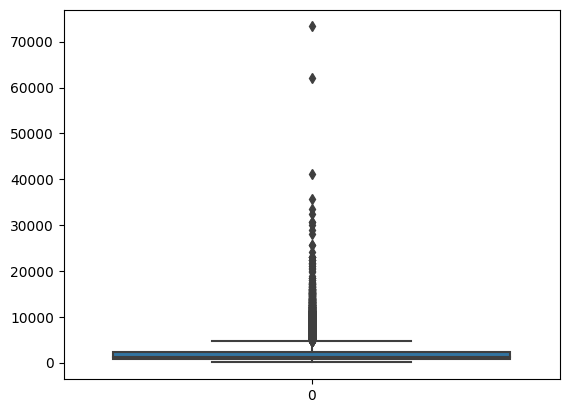

In [ ]:
sns.boxplot(linearized_arrays['V28'])

<Axes: ylabel='Density'>

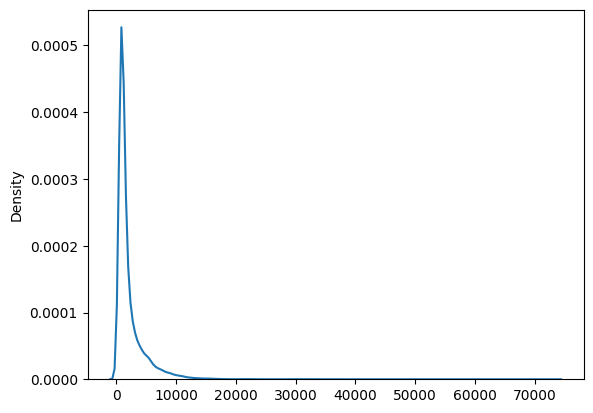

In [ ]:
sns.kdeplot(linearized_arrays['V28'])

In [ ]:
max(linearized_arrays['V28'])

73312.5

In [ ]:
min(linearized_arrays['V28'])

26.6

In [ ]:
np.mean(linearized_arrays['V28'])

2152.505159556717

In [ ]:
np.median(linearized_arrays['V28'])

1208.1434

In [ ]:
pip install scipy

Kurtosis

In [ ]:
from scipy.stats import kurtosis

In [ ]:
for i, (variable, values) in enumerate(linearized_arrays.items()):
  print(kurtosis(values))

13.255965758400809
2.9657459841125764
4.0525033275446365
3.832287138102247
2.959787626487839
60.80340473164433
19.830444496927512
-0.1500095097635934
70.26575996385642
8.875601321466139
0.4965005597676613
-0.03825561947700562
5722.862107830129


## Distribuições KDE Plot

In [ ]:
linearized_arrays

{'V11': array([ 214.,  199.,  250., ..., 1439.,  136.,  176.]),
 'V12': array([214., 199., 250., ...,   0., 136., 154.]),
 'V14': array([712. , 660. , 828. , ..., 881.6, 381. , 431. ]),
 'V15': array([3.3271 , 3.3166 , 3.312  , ..., 2.82346, 2.8015 , 2.7987 ]),
 'V17': array([214., 199., 250., ...,   0., 136., 154.]),
 'V18': array([2299.7103 , 2106.8392 , 1987.792  , ..., 7025.19522, 4077.4265 ,
        9293.5714 ]),
 'V19': array([ 691.2051 ,  635.2439 ,  600.1787 , ..., 2892.63402, 1455.4593 ,
        3320.6729 ]),
 'V27': array([47.8692 , 45.5176 , 46.588  , ..., 41.47002, 59.4559 , 51.7597 ]),
 'V28': array([1158.743  ,  927.7688 , 1120.392  , ..., 2744.66062, 2305.8824 ,
        6389.0195 ]),
 'V29': array([ 98.1308 ,  94.9749 ,  93.6    , ...,  98.93952,  96.3235 ,
        100.     ]),
 'V31': array([50.3865 , 44.0361 , 56.3636 , ..., 49.68564, 56.5524 , 68.7467 ]),
 'V32': array([49.5895 , 45.9612 , 49.069  , ..., 42.76524, 62.7045 , 52.4762 ]),
 'V43': array([100., 100., 100.,

In [ ]:
import matplotlib.pyplot as plt


def plot_kde_distributions(linearized_arrays):
    # Create subplots
    fig, axes = plt.subplots(nrows=len(linearized_arrays), ncols=1, figsize=(8, 4 * len(linearized_arrays)))

    # Plot KDE for each variable
    for i, (variable, values) in enumerate(linearized_arrays.items()):
        sns.kdeplot(data=values, ax=axes[i], fill=True, label=variable)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


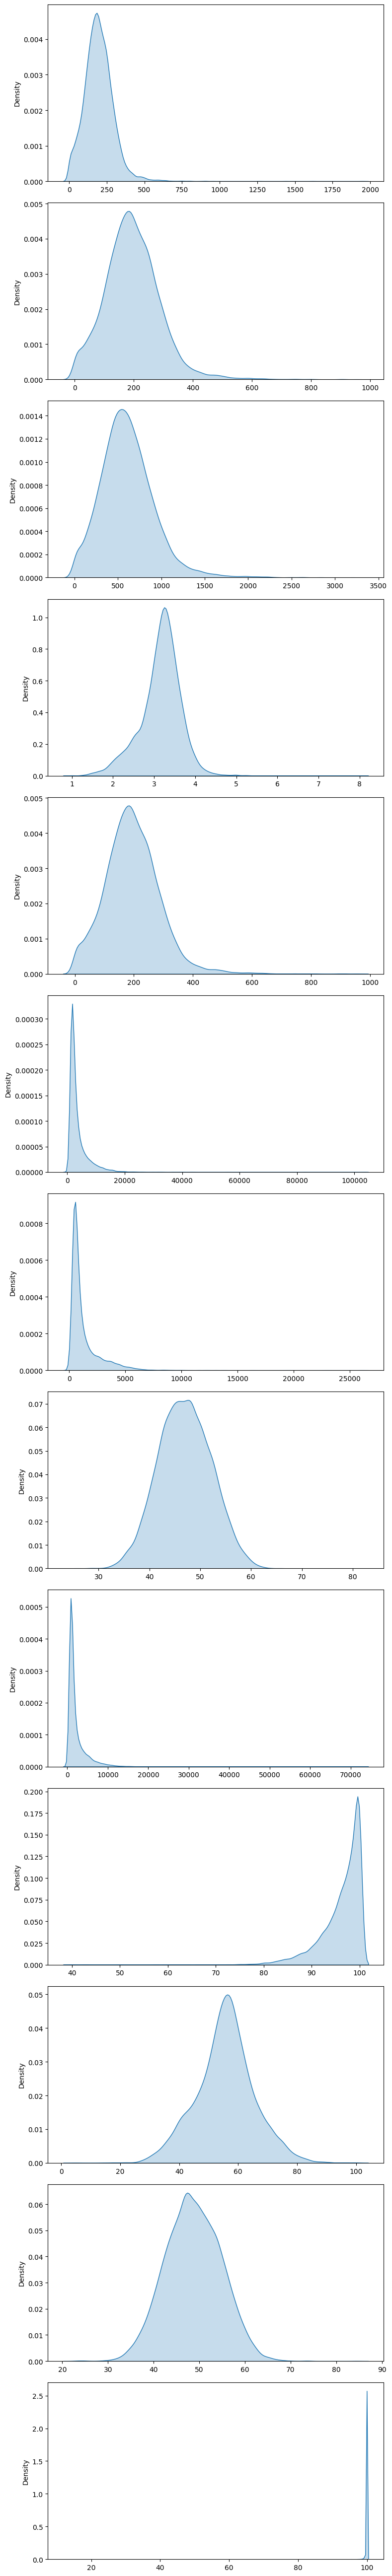

In [ ]:
plot_kde_distributions(linearized_arrays)

In [ ]:
def plot_kde_distributions(linearized_arrays):
    num_variables = len(linearized_arrays)

    # Determine the layout based on the number of variables
    num_plots_per_row = 3
    num_rows = (num_variables // num_plots_per_row) + (num_variables % num_plots_per_row > 0)
    num_cols = num_plots_per_row

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

    # Flatten the 2D array of subplots for easy indexing
    axes = axes.flatten()

    # Plot KDE for each variable
    for i, (variable, values) in enumerate(linearized_arrays.items()):
        sns.kdeplot(data=values, ax=axes[i], fill=True)
        axes[i].set_title(variable)  # Set the variable name as the title

    # Remove empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


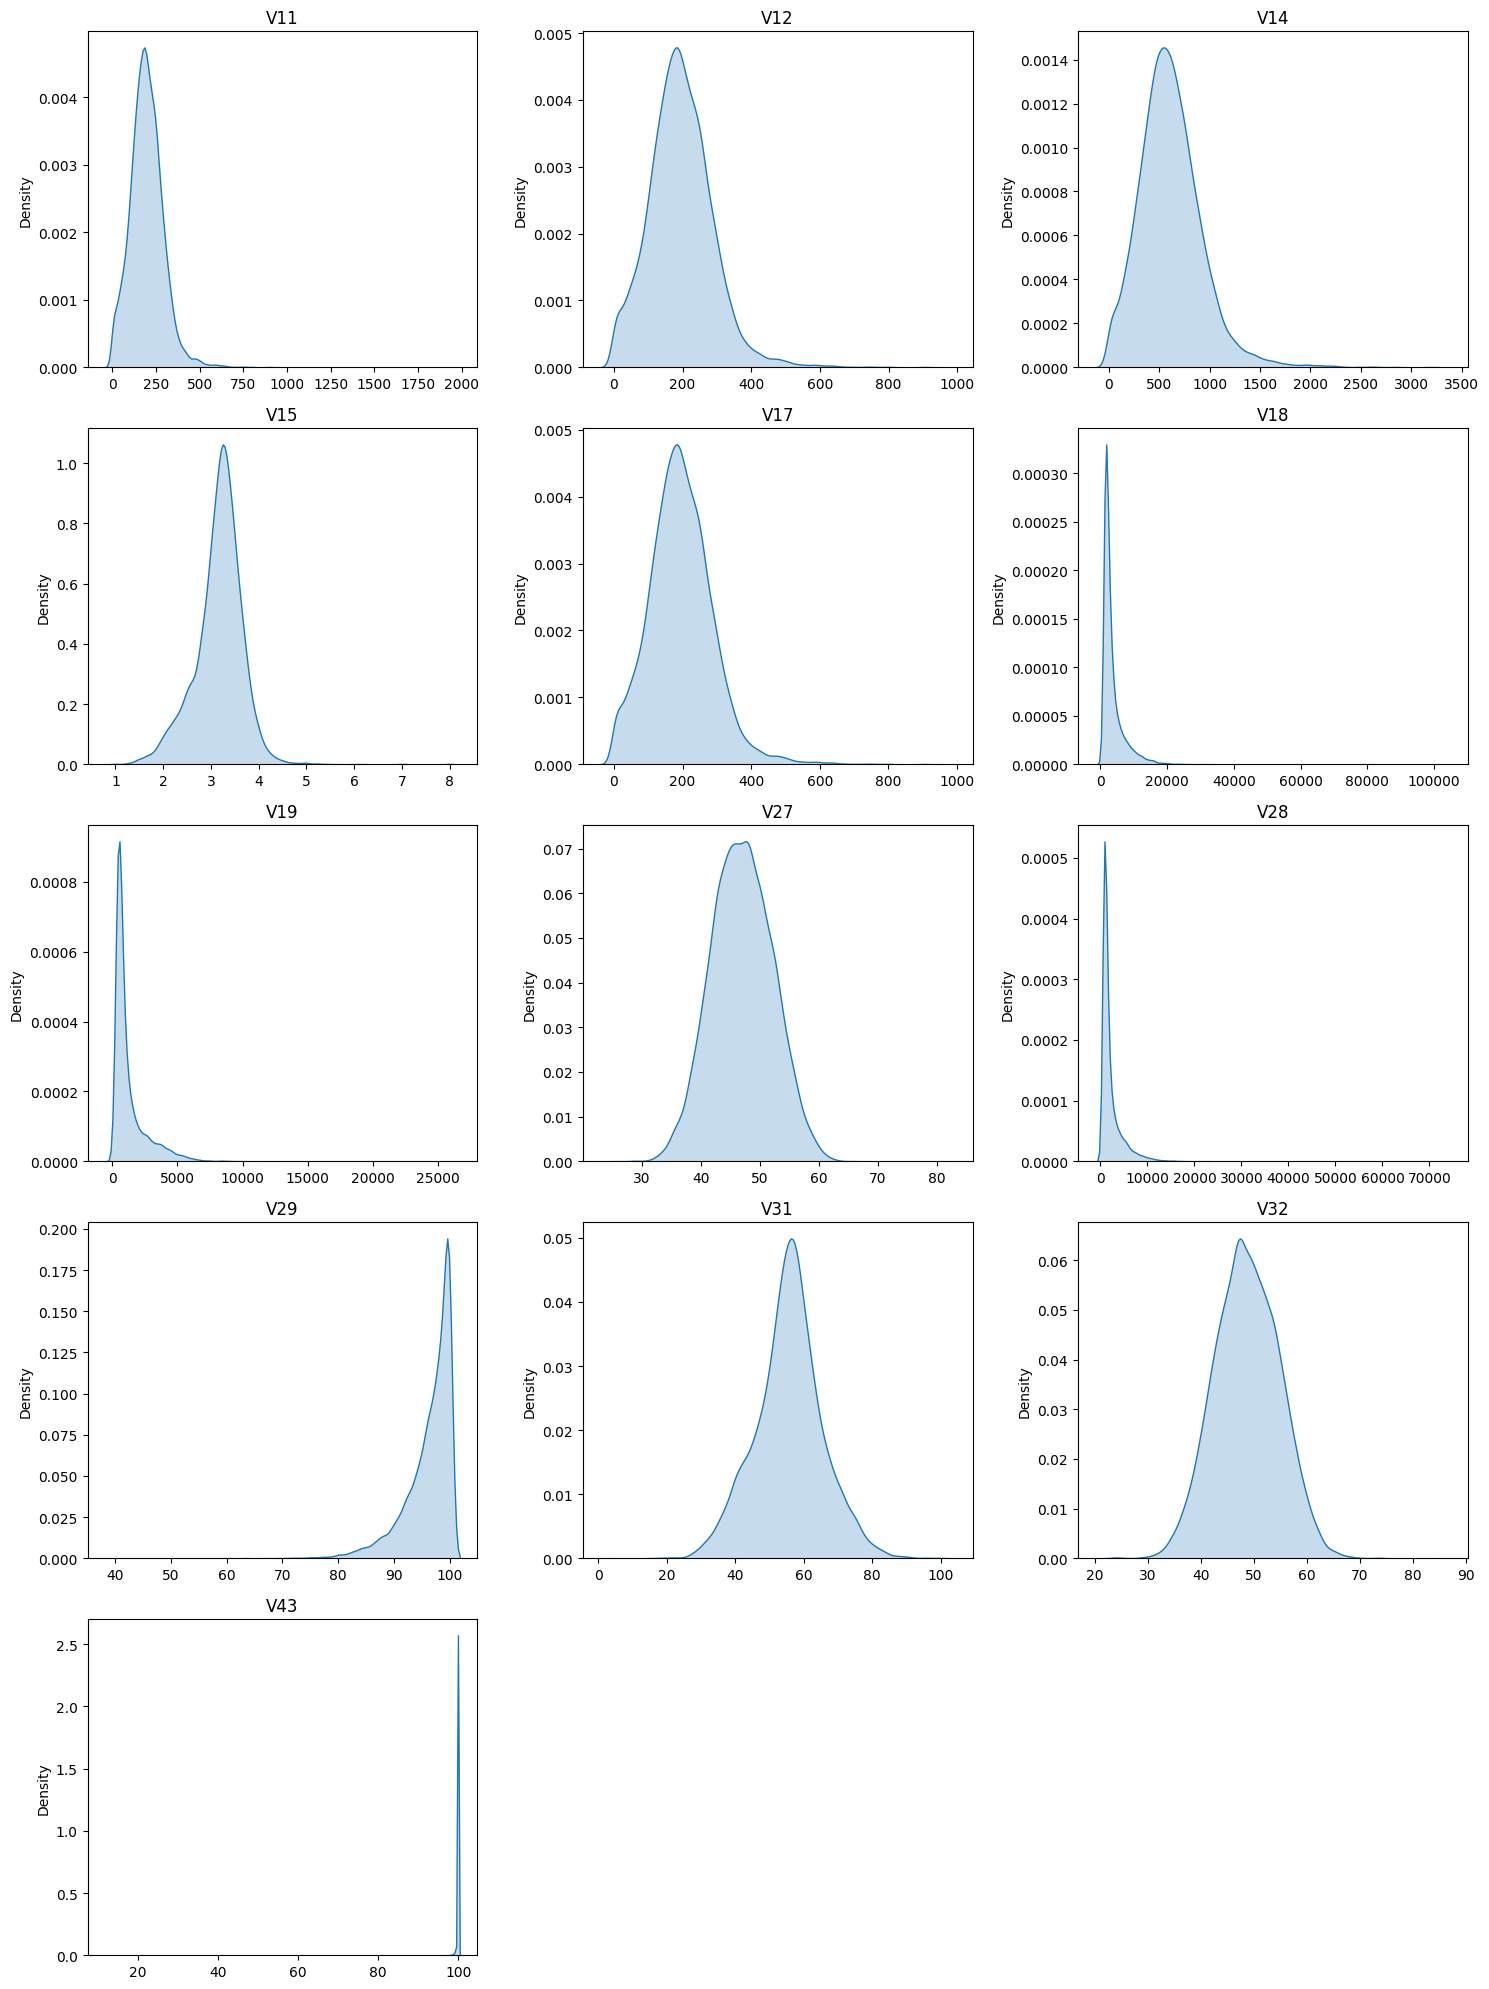

In [ ]:
plot_kde_distributions(linearized_arrays)

# Análise de Mediana/Média

In [ ]:
cp "/gdrive/MyDrive/median_topology_distances.csv" "/boot/"

In [ ]:
cp "/gdrive/MyDrive/mean_topology_distances.csv" "/boot/"

In [ ]:
cp "/gdrive/MyDrive/vector_topology_distances.csv" "/boot/"

In [ ]:
cp "/gdrive/MyDrive/vectorWoutlier_topology_distances.csv" "/boot/"

In [ ]:
cp "/gdrive/MyDrive/medianWoutlier_topology_distances.csv" "/boot/"

In [ ]:
cp "/gdrive/MyDrive/meanWoutlier_topology_distances.csv" "/boot/"

In [ ]:
import pandas as pd
import numpy as np

def get_triu_array(df):
  arr = np.array(df.values)
  indices = np.triu_indices(arr.shape[0], k=1)  #Indices of the upper triangular matrix.
  arr = arr[indices] #Upper triangular matrix

  return arr

## Mediana

In [ ]:
df_median= pd.read_csv('/boot/median_topology_distances.csv')

In [ ]:
df_median

,Unnamed: 0,'4729699','4722902','4729602','numIPVS','4721103','4711301','5620103','5611201','5611202',...,'V17','V15','ciliarR','V29','V31','V32','V27','V18','V19','V28'
0,'4729699',0.00,0.10,0.30,0.30,0.30,0.35,0.35,0.30,0.30,...,0.70,0.60,0.65,0.75,0.80,0.80,0.75,0.80,0.85,0.85
1,'4722902',0.10,0.00,0.25,0.25,0.25,0.30,0.30,0.25,0.25,...,0.65,0.55,0.60,0.70,0.75,0.75,0.70,0.75,0.80,0.80
2,'4729602',0.30,0.25,0.00,0.05,0.15,0.20,0.20,0.25,0.25,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
3,'numIPVS',0.30,0.25,0.05,0.00,0.15,0.20,0.20,0.25,0.25,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
4,'4721103',0.30,0.25,0.15,0.15,0.00,0.10,0.10,0.25,0.25,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
5,'4711301',0.35,0.30,0.20,0.20,0.10,0.00,0.05,0.30,0.30,...,0.80,0.70,0.75,0.85,0.90,0.90,0.85,0.90,0.95,0.95
6,'5620103',0.35,0.30,0.20,0.20,0.10,0.05,0.00,0.30,0.30,...,0.80,0.70,0.75,0.85,0.90,0.90,0.85,0.90,0.95,0.95
7,'5611201',0.30,0.25,0.25,0.25,0.25,0.30,0.30,0.00,0.05,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
8,'5611202',0.30,0.25,0.25,0.25,0.25,0.30,0.30,0.05,0.00,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
9,'4711302',0.35,0.30,0.30,0.30,0.30,0.35,0.35,0.20,0.20,...,0.80,0.70,0.75,0.85,0.90,0.90,0.85,0.90,0.95,0.95


In [ ]:
arr_median= get_triu_array(df_median)

In [ ]:
arr_median

array([0.0, 0.1, 0.3, 0.3, 0.3, 0.35, 0.35, 0.3, 0.3, 0.35, 0.35, 0.35,
       0.4, 0.4, 0.2, 0.3, 0.3, 0.35, 0.35, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.5, 0.5, 0.55, 0.55, 0.6, 0.65, 0.7, 0.7, 0.6, 0.65, 0.75,
       0.8, 0.8, 0.75, 0.8, 0.85, 0.0, 0.25, 0.25, 0.25, 0.3, 0.3, 0.25,
       0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.15, 0.25, 0.25, 0.3, 0.3, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.45, 0.5, 0.5, 0.55, 0.6, 0.65,
       0.65, 0.55, 0.6, 0.7, 0.75, 0.75, 0.7, 0.75, 0.8, 0.0, 0.05, 0.15,
       0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.25, 0.35, 0.35,
       0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.55, 0.55, 0.6, 0.6, 0.65,
       0.7, 0.75, 0.75, 0.65, 0.7, 0.8, 0.85, 0.85, 0.8, 0.85, 0.9, 0.0,
       0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.25, 0.35,
       0.35, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.55, 0.55, 0.6, 0.6,
       0.65, 0.7, 0.75, 0.75, 0.65, 0.7, 0.8, 0.85, 0.85, 0.8, 0.85, 0.9,
       0.0, 0.1, 0.1, 0.25, 0.25, 0.3, 0.3, 0

## Média

In [ ]:
df_mean= pd.read_csv('/boot/mean_topology_distances.csv')

In [ ]:
df_mean

,Unnamed: 0,'4711301','5620103','5612100','slivres','4722902','4729602','numIPVS','4722901','4721103',...,'V32','V29','V31','V18','V19','V28','V14','V11','V12','V17'
0,'4711301',0.00,0.06,0.18,0.18,0.29,0.35,0.35,0.41,0.47,...,0.94,0.94,0.94,0.88,0.94,0.94,0.88,0.94,1.00,1.00
1,'5620103',0.06,0.00,0.18,0.18,0.29,0.35,0.35,0.41,0.47,...,0.94,0.94,0.94,0.88,0.94,0.94,0.88,0.94,1.00,1.00
2,'5612100',0.18,0.18,0.00,0.06,0.29,0.35,0.35,0.41,0.47,...,0.94,0.94,0.94,0.88,0.94,0.94,0.88,0.94,1.00,1.00
3,'slivres',0.18,0.18,0.06,0.00,0.29,0.35,0.35,0.41,0.47,...,0.94,0.94,0.94,0.88,0.94,0.94,0.88,0.94,1.00,1.00
4,'4722902',0.29,0.29,0.29,0.29,0.00,0.12,0.12,0.29,0.35,...,0.82,0.82,0.82,0.76,0.82,0.82,0.76,0.82,0.88,0.88
5,'4729602',0.35,0.35,0.35,0.35,0.12,0.00,0.06,0.35,0.41,...,0.88,0.88,0.88,0.82,0.88,0.88,0.82,0.88,0.94,0.94
6,'numIPVS',0.35,0.35,0.35,0.35,0.12,0.06,0.00,0.35,0.41,...,0.88,0.88,0.88,0.82,0.88,0.88,0.82,0.88,0.94,0.94
7,'4722901',0.41,0.41,0.41,0.41,0.29,0.35,0.35,0.00,0.12,...,0.82,0.82,0.82,0.76,0.82,0.82,0.76,0.82,0.88,0.88
8,'4721103',0.47,0.47,0.47,0.47,0.35,0.41,0.41,0.12,0.00,...,0.88,0.88,0.88,0.82,0.88,0.88,0.82,0.88,0.94,0.94
9,'4724500',0.47,0.47,0.47,0.47,0.35,0.41,0.41,0.12,0.06,...,0.88,0.88,0.88,0.82,0.88,0.88,0.82,0.88,0.94,0.94


In [ ]:
arr_mean= get_triu_array(df_mean)

In [ ]:
arr_mean

array([0.0, 0.06, 0.18, 0.18, 0.29, 0.35, 0.35, 0.41, 0.47, 0.47, 0.47,
       0.47, 0.47, 0.53, 0.53, 0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.59,
       0.59, 0.47, 0.59, 0.59, 0.65, 0.65, 0.65, 0.71, 0.82, 0.94, 0.94,
       0.94, 0.94, 0.88, 0.94, 0.94, 0.88, 0.94, 1.0, 0.0, 0.18, 0.18,
       0.29, 0.35, 0.35, 0.41, 0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.53,
       0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.59, 0.59, 0.47, 0.59, 0.59,
       0.65, 0.65, 0.65, 0.71, 0.82, 0.94, 0.94, 0.94, 0.94, 0.88, 0.94,
       0.94, 0.88, 0.94, 1.0, 0.0, 0.06, 0.29, 0.35, 0.35, 0.41, 0.47,
       0.47, 0.47, 0.47, 0.47, 0.53, 0.53, 0.47, 0.47, 0.47, 0.47, 0.47,
       0.53, 0.59, 0.59, 0.47, 0.59, 0.59, 0.65, 0.65, 0.65, 0.71, 0.82,
       0.94, 0.94, 0.94, 0.94, 0.88, 0.94, 0.94, 0.88, 0.94, 1.0, 0.0,
       0.29, 0.35, 0.35, 0.41, 0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.53,
       0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.59, 0.59, 0.47, 0.59, 0.59,
       0.65, 0.65, 0.65, 0.71, 0.82, 0.94, 0.94, 0.94, 0.9

## Vetores

In [ ]:
df_vector= pd.read_csv('/boot/vector_topology_distances.csv')

In [ ]:
df_vector

,Unnamed: 0,'4712100','4729699','5611202','4721102','4721104','4711302','4722901','4721103','4724500',...,'V14','V11','V12','V17','V18','V19','V28','V31','V27','V32'
0,'4712100',0.00,0.06,0.17,0.22,0.22,0.33,0.33,0.39,0.39,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
1,'4729699',0.06,0.00,0.17,0.22,0.22,0.33,0.33,0.39,0.39,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
2,'5611202',0.17,0.17,0.00,0.11,0.11,0.33,0.33,0.39,0.39,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
3,'4721102',0.22,0.22,0.11,0.00,0.06,0.39,0.39,0.44,0.44,...,0.89,0.94,1.00,1.00,0.89,0.94,0.94,0.89,0.94,0.94
4,'4721104',0.22,0.22,0.11,0.06,0.00,0.39,0.39,0.44,0.44,...,0.89,0.94,1.00,1.00,0.89,0.94,0.94,0.89,0.94,0.94
5,'4711302',0.33,0.33,0.33,0.39,0.39,0.00,0.06,0.22,0.22,...,0.78,0.83,0.89,0.89,0.78,0.83,0.83,0.78,0.83,0.83
6,'4722901',0.33,0.33,0.33,0.39,0.39,0.06,0.00,0.22,0.22,...,0.78,0.83,0.89,0.89,0.78,0.83,0.83,0.78,0.83,0.83
7,'4721103',0.39,0.39,0.39,0.44,0.44,0.22,0.22,0.00,0.06,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
8,'4724500',0.39,0.39,0.39,0.44,0.44,0.22,0.22,0.06,0.00,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
9,'4722902',0.44,0.44,0.44,0.50,0.50,0.28,0.28,0.22,0.22,...,0.89,0.94,1.00,1.00,0.89,0.94,0.94,0.89,0.94,0.94


In [ ]:
arr_vector= get_triu_array(df_vector)

In [ ]:
arr_vector

array([0.0, 0.06, 0.17, 0.22, 0.22, 0.33, 0.33, 0.39, 0.39, 0.44, 0.44,
       0.44, 0.44, 0.33, 0.39, 0.39, 0.39, 0.39, 0.39, 0.5, 0.56, 0.61,
       0.61, 0.56, 0.56, 0.61, 0.67, 0.67, 0.61, 0.67, 0.83, 0.83, 0.83,
       0.89, 0.94, 0.94, 0.83, 0.89, 0.89, 0.83, 0.89, 0.0, 0.17, 0.22,
       0.22, 0.33, 0.33, 0.39, 0.39, 0.44, 0.44, 0.44, 0.44, 0.33, 0.39,
       0.39, 0.39, 0.39, 0.39, 0.5, 0.56, 0.61, 0.61, 0.56, 0.56, 0.61,
       0.67, 0.67, 0.61, 0.67, 0.83, 0.83, 0.83, 0.89, 0.94, 0.94, 0.83,
       0.89, 0.89, 0.83, 0.89, 0.0, 0.11, 0.11, 0.33, 0.33, 0.39, 0.39,
       0.44, 0.44, 0.44, 0.44, 0.33, 0.39, 0.39, 0.39, 0.39, 0.39, 0.5,
       0.56, 0.61, 0.61, 0.56, 0.56, 0.61, 0.67, 0.67, 0.61, 0.67, 0.83,
       0.83, 0.83, 0.89, 0.94, 0.94, 0.83, 0.89, 0.89, 0.83, 0.89, 0.0,
       0.06, 0.39, 0.39, 0.44, 0.44, 0.5, 0.5, 0.5, 0.5, 0.39, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.56, 0.61, 0.67, 0.67, 0.61, 0.61, 0.67, 0.72,
       0.72, 0.67, 0.72, 0.89, 0.89, 0.89, 0.94, 1.0, 1.

## Correlação de Pearson

In [ ]:
pip install scipy

In [ ]:
from scipy.stats import pearsonr

def my_statistic(x, y):
    return pearsonr(x, y)[0]

In [ ]:
from scipy.stats import bootstrap

def pair_bootstrap(x,y):
  rng = np.random.default_rng()
  res = bootstrap((x, y), my_statistic, vectorized=False, paired=True,
                random_state=rng)

  return res

In [ ]:
res_median_mean= pair_bootstrap(arr_median,arr_mean)

In [ ]:
print(res_median_mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.8837875286507295, high=0.9099197168633475), bootstrap_distribution=array([0.89613767, 0.90470532, 0.89217158, ..., 0.89514211, 0.91389554,
       0.89623213]), standard_error=0.006667008595464716)


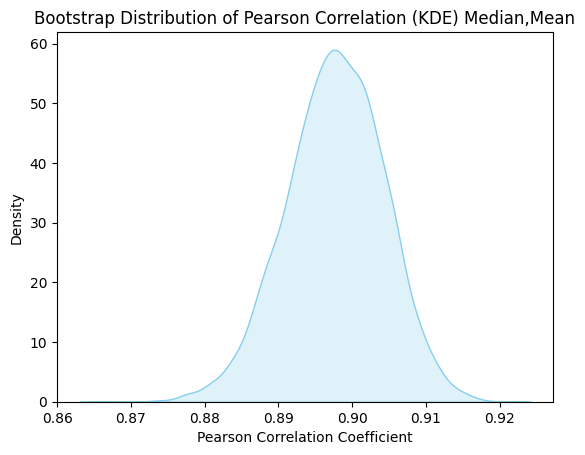

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_median_mean.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) Median,Mean')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import bootstrap

res_mean_median= pair_bootstrap(arr_mean,arr_median)

In [ ]:
res_mean_median

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.8834177603481684, high=0.9100867253440365), bootstrap_distribution=array([0.90473395, 0.89286561, 0.89269887, ..., 0.89730062, 0.89968721,
       0.90496522]), standard_error=0.006719721040235698)

Kurtosis

In [ ]:
from scipy.stats import kurtosis

print(kurtosis(res_mean_median.bootstrap_distribution, axis=0, bias=True))

0.06937716088606294


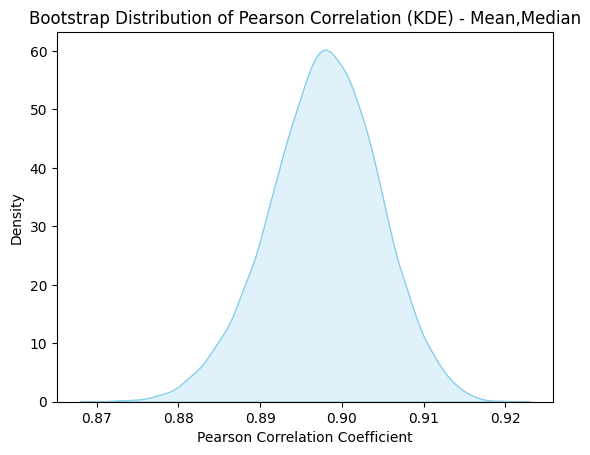

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_mean_median.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Mean,Median')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import bootstrap

res_mean_vector= pair_bootstrap(arr_mean,arr_vector)

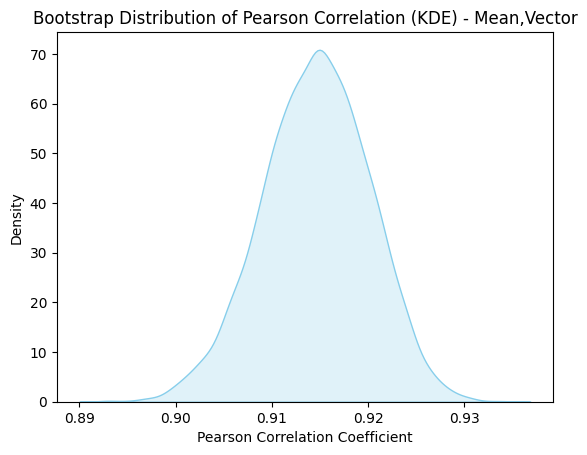

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_mean_vector.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Mean,Vector')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import bootstrap

res_vector_mean= pair_bootstrap(arr_vector,arr_mean)

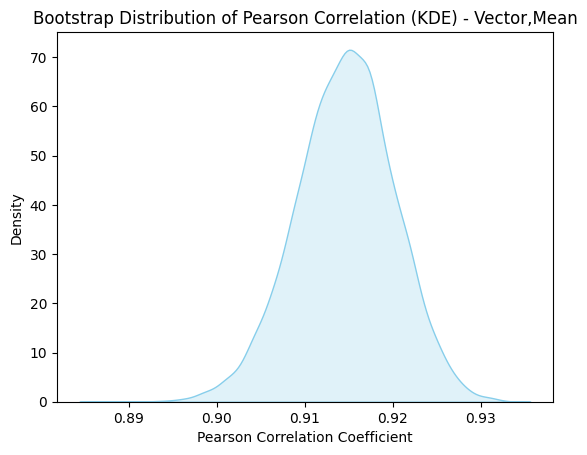

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_vector_mean.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Vector,Mean')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import bootstrap

res_vector_median= pair_bootstrap(arr_vector,arr_median)

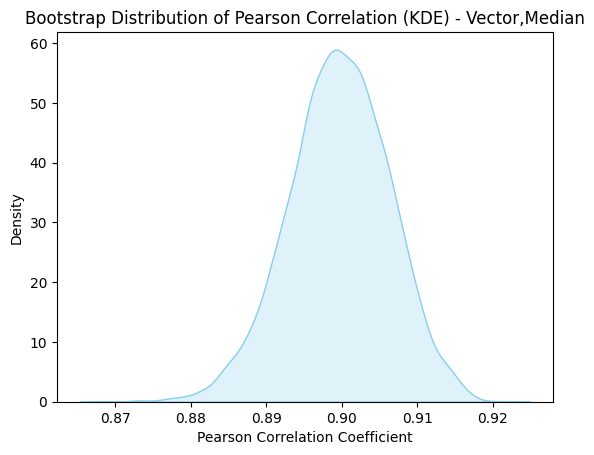

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_vector_median.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Vector,Median')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import bootstrap

res_median_vector= pair_bootstrap(arr_median,arr_vector)

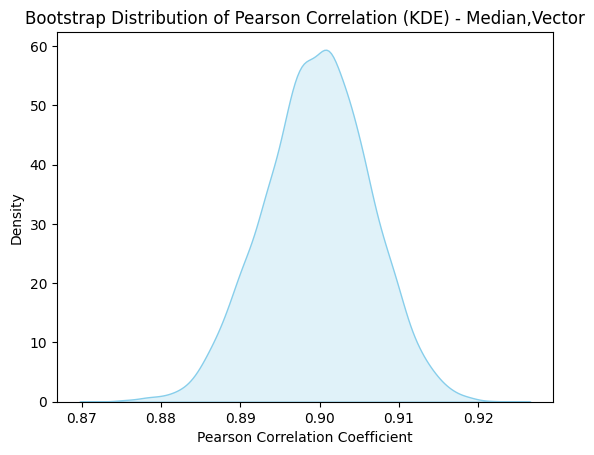

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_median_vector.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Median,Vector')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


## Sem Outliers


### Mediana

In [ ]:
df_median= pd.read_csv('/boot/medianWoutlier_topology_distances.csv')

In [ ]:
df_median

,Unnamed: 0,'4729699','4722902','4729602','numIPVS','4721103','4711301','5620103','5611201','5611202',...,'V17','V15','ciliarR','V29','V31','V32','V27','V18','V19','V28'
0,'4729699',0.00,0.10,0.30,0.30,0.30,0.35,0.35,0.30,0.30,...,0.70,0.60,0.65,0.75,0.80,0.80,0.75,0.80,0.85,0.85
1,'4722902',0.10,0.00,0.25,0.25,0.25,0.30,0.30,0.25,0.25,...,0.65,0.55,0.60,0.70,0.75,0.75,0.70,0.75,0.80,0.80
2,'4729602',0.30,0.25,0.00,0.05,0.15,0.20,0.20,0.25,0.25,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
3,'numIPVS',0.30,0.25,0.05,0.00,0.15,0.20,0.20,0.25,0.25,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
4,'4721103',0.30,0.25,0.15,0.15,0.00,0.10,0.10,0.25,0.25,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
5,'4711301',0.35,0.30,0.20,0.20,0.10,0.00,0.05,0.30,0.30,...,0.80,0.70,0.75,0.85,0.90,0.90,0.85,0.90,0.95,0.95
6,'5620103',0.35,0.30,0.20,0.20,0.10,0.05,0.00,0.30,0.30,...,0.80,0.70,0.75,0.85,0.90,0.90,0.85,0.90,0.95,0.95
7,'5611201',0.30,0.25,0.25,0.25,0.25,0.30,0.30,0.00,0.05,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
8,'5611202',0.30,0.25,0.25,0.25,0.25,0.30,0.30,0.05,0.00,...,0.75,0.65,0.70,0.80,0.85,0.85,0.80,0.85,0.90,0.90
9,'4711302',0.35,0.30,0.30,0.30,0.30,0.35,0.35,0.20,0.20,...,0.80,0.70,0.75,0.85,0.90,0.90,0.85,0.90,0.95,0.95


In [ ]:
arr_median= get_triu_array(df_median)

In [ ]:
arr_median

array([0.0, 0.1, 0.3, 0.3, 0.3, 0.35, 0.35, 0.3, 0.3, 0.35, 0.35, 0.35,
       0.4, 0.4, 0.2, 0.3, 0.3, 0.35, 0.35, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.5, 0.5, 0.55, 0.55, 0.6, 0.65, 0.7, 0.7, 0.6, 0.65, 0.75,
       0.8, 0.8, 0.75, 0.8, 0.85, 0.0, 0.25, 0.25, 0.25, 0.3, 0.3, 0.25,
       0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.15, 0.25, 0.25, 0.3, 0.3, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.45, 0.5, 0.5, 0.55, 0.6, 0.65,
       0.65, 0.55, 0.6, 0.7, 0.75, 0.75, 0.7, 0.75, 0.8, 0.0, 0.05, 0.15,
       0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.25, 0.35, 0.35,
       0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.55, 0.55, 0.6, 0.6, 0.65,
       0.7, 0.75, 0.75, 0.65, 0.7, 0.8, 0.85, 0.85, 0.8, 0.85, 0.9, 0.0,
       0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.25, 0.35,
       0.35, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.55, 0.55, 0.6, 0.6,
       0.65, 0.7, 0.75, 0.75, 0.65, 0.7, 0.8, 0.85, 0.85, 0.8, 0.85, 0.9,
       0.0, 0.1, 0.1, 0.25, 0.25, 0.3, 0.3, 0

### Média

In [ ]:
df_mean= pd.read_csv('/boot/meanWoutlier_topology_distances.csv')

In [ ]:
df_mean

,Unnamed: 0,'4711301','5620103','5612100','slivres','4722902','4729602','numIPVS','4722901','4721103',...,'V32','V29','V31','V18','V19','V28','V14','V11','V12','V17'
0,'4711301',0.00,0.06,0.18,0.18,0.29,0.35,0.35,0.41,0.47,...,0.94,0.94,0.94,0.88,0.94,0.94,0.88,0.94,1.00,1.00
1,'5620103',0.06,0.00,0.18,0.18,0.29,0.35,0.35,0.41,0.47,...,0.94,0.94,0.94,0.88,0.94,0.94,0.88,0.94,1.00,1.00
2,'5612100',0.18,0.18,0.00,0.06,0.29,0.35,0.35,0.41,0.47,...,0.94,0.94,0.94,0.88,0.94,0.94,0.88,0.94,1.00,1.00
3,'slivres',0.18,0.18,0.06,0.00,0.29,0.35,0.35,0.41,0.47,...,0.94,0.94,0.94,0.88,0.94,0.94,0.88,0.94,1.00,1.00
4,'4722902',0.29,0.29,0.29,0.29,0.00,0.12,0.12,0.29,0.35,...,0.82,0.82,0.82,0.76,0.82,0.82,0.76,0.82,0.88,0.88
5,'4729602',0.35,0.35,0.35,0.35,0.12,0.00,0.06,0.35,0.41,...,0.88,0.88,0.88,0.82,0.88,0.88,0.82,0.88,0.94,0.94
6,'numIPVS',0.35,0.35,0.35,0.35,0.12,0.06,0.00,0.35,0.41,...,0.88,0.88,0.88,0.82,0.88,0.88,0.82,0.88,0.94,0.94
7,'4722901',0.41,0.41,0.41,0.41,0.29,0.35,0.35,0.00,0.12,...,0.82,0.82,0.82,0.76,0.82,0.82,0.76,0.82,0.88,0.88
8,'4721103',0.47,0.47,0.47,0.47,0.35,0.41,0.41,0.12,0.00,...,0.88,0.88,0.88,0.82,0.88,0.88,0.82,0.88,0.94,0.94
9,'4724500',0.47,0.47,0.47,0.47,0.35,0.41,0.41,0.12,0.06,...,0.88,0.88,0.88,0.82,0.88,0.88,0.82,0.88,0.94,0.94


In [ ]:
arr_mean= get_triu_array(df_mean)

In [ ]:
arr_mean

array([0.0, 0.06, 0.18, 0.18, 0.29, 0.35, 0.35, 0.41, 0.47, 0.47, 0.47,
       0.47, 0.47, 0.53, 0.53, 0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.59,
       0.59, 0.47, 0.59, 0.59, 0.65, 0.65, 0.65, 0.71, 0.82, 0.94, 0.94,
       0.94, 0.94, 0.88, 0.94, 0.94, 0.88, 0.94, 1.0, 0.0, 0.18, 0.18,
       0.29, 0.35, 0.35, 0.41, 0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.53,
       0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.59, 0.59, 0.47, 0.59, 0.59,
       0.65, 0.65, 0.65, 0.71, 0.82, 0.94, 0.94, 0.94, 0.94, 0.88, 0.94,
       0.94, 0.88, 0.94, 1.0, 0.0, 0.06, 0.29, 0.35, 0.35, 0.41, 0.47,
       0.47, 0.47, 0.47, 0.47, 0.53, 0.53, 0.47, 0.47, 0.47, 0.47, 0.47,
       0.53, 0.59, 0.59, 0.47, 0.59, 0.59, 0.65, 0.65, 0.65, 0.71, 0.82,
       0.94, 0.94, 0.94, 0.94, 0.88, 0.94, 0.94, 0.88, 0.94, 1.0, 0.0,
       0.29, 0.35, 0.35, 0.41, 0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.53,
       0.47, 0.47, 0.47, 0.47, 0.47, 0.53, 0.59, 0.59, 0.47, 0.59, 0.59,
       0.65, 0.65, 0.65, 0.71, 0.82, 0.94, 0.94, 0.94, 0.9

### Vetores

In [ ]:
df_vector= pd.read_csv('/boot/vectorWoutlier_topology_distances.csv')

In [ ]:
df_vector

,Unnamed: 0,'4712100','4729699','5611202','4721102','4721104','4711302','4722901','4721103','4724500',...,'V14','V11','V12','V17','V18','V19','V28','V31','V27','V32'
0,'4712100',0.00,0.06,0.17,0.22,0.22,0.33,0.33,0.39,0.39,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
1,'4729699',0.06,0.00,0.17,0.22,0.22,0.33,0.33,0.39,0.39,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
2,'5611202',0.17,0.17,0.00,0.11,0.11,0.33,0.33,0.39,0.39,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
3,'4721102',0.22,0.22,0.11,0.00,0.06,0.39,0.39,0.44,0.44,...,0.89,0.94,1.00,1.00,0.89,0.94,0.94,0.89,0.94,0.94
4,'4721104',0.22,0.22,0.11,0.06,0.00,0.39,0.39,0.44,0.44,...,0.89,0.94,1.00,1.00,0.89,0.94,0.94,0.89,0.94,0.94
5,'4711302',0.33,0.33,0.33,0.39,0.39,0.00,0.06,0.22,0.22,...,0.78,0.83,0.89,0.89,0.78,0.83,0.83,0.78,0.83,0.83
6,'4722901',0.33,0.33,0.33,0.39,0.39,0.06,0.00,0.22,0.22,...,0.78,0.83,0.89,0.89,0.78,0.83,0.83,0.78,0.83,0.83
7,'4721103',0.39,0.39,0.39,0.44,0.44,0.22,0.22,0.00,0.06,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
8,'4724500',0.39,0.39,0.39,0.44,0.44,0.22,0.22,0.06,0.00,...,0.83,0.89,0.94,0.94,0.83,0.89,0.89,0.83,0.89,0.89
9,'4722902',0.44,0.44,0.44,0.50,0.50,0.28,0.28,0.22,0.22,...,0.89,0.94,1.00,1.00,0.89,0.94,0.94,0.89,0.94,0.94


In [ ]:
arr_vector= get_triu_array(df_vector)

In [ ]:
arr_vector

array([0.0, 0.06, 0.17, 0.22, 0.22, 0.33, 0.33, 0.39, 0.39, 0.44, 0.44,
       0.44, 0.44, 0.33, 0.39, 0.39, 0.39, 0.39, 0.39, 0.5, 0.56, 0.61,
       0.61, 0.56, 0.56, 0.61, 0.67, 0.67, 0.61, 0.67, 0.83, 0.83, 0.83,
       0.89, 0.94, 0.94, 0.83, 0.89, 0.89, 0.83, 0.89, 0.0, 0.17, 0.22,
       0.22, 0.33, 0.33, 0.39, 0.39, 0.44, 0.44, 0.44, 0.44, 0.33, 0.39,
       0.39, 0.39, 0.39, 0.39, 0.5, 0.56, 0.61, 0.61, 0.56, 0.56, 0.61,
       0.67, 0.67, 0.61, 0.67, 0.83, 0.83, 0.83, 0.89, 0.94, 0.94, 0.83,
       0.89, 0.89, 0.83, 0.89, 0.0, 0.11, 0.11, 0.33, 0.33, 0.39, 0.39,
       0.44, 0.44, 0.44, 0.44, 0.33, 0.39, 0.39, 0.39, 0.39, 0.39, 0.5,
       0.56, 0.61, 0.61, 0.56, 0.56, 0.61, 0.67, 0.67, 0.61, 0.67, 0.83,
       0.83, 0.83, 0.89, 0.94, 0.94, 0.83, 0.89, 0.89, 0.83, 0.89, 0.0,
       0.06, 0.39, 0.39, 0.44, 0.44, 0.5, 0.5, 0.5, 0.5, 0.39, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.56, 0.61, 0.67, 0.67, 0.61, 0.61, 0.67, 0.72,
       0.72, 0.67, 0.72, 0.89, 0.89, 0.89, 0.94, 1.0, 1.

### Correlação de Pearson

In [ ]:
pip install scipy

In [ ]:
from scipy.stats import pearsonr

def my_statistic(x, y):
    return pearsonr(x, y)[0]

In [ ]:
from scipy.stats import bootstrap

def pair_bootstrap(x,y):
  rng = np.random.default_rng()
  res = bootstrap((x, y), my_statistic, vectorized=False, paired=True,
                random_state=rng)

  return res

In [ ]:
res_median_mean= pair_bootstrap(arr_median,arr_mean)

In [ ]:
print(res_median_mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.8837875286507295, high=0.9099197168633475), bootstrap_distribution=array([0.89613767, 0.90470532, 0.89217158, ..., 0.89514211, 0.91389554,
       0.89623213]), standard_error=0.006667008595464716)


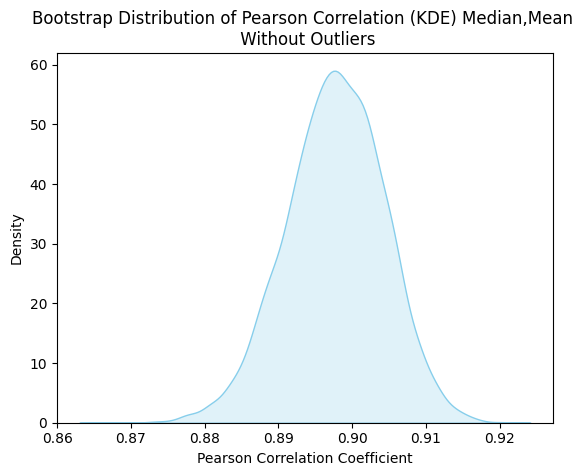

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_median_mean.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) Median,Mean \n Without Outliers')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import bootstrap

res_mean_median= pair_bootstrap(arr_mean,arr_median)

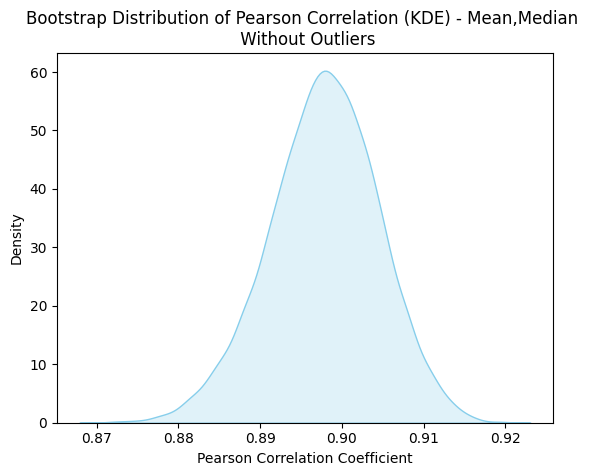

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_mean_median.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Mean,Median \n Without Outliers')

plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import bootstrap

res_mean_vector= pair_bootstrap(arr_mean,arr_vector)

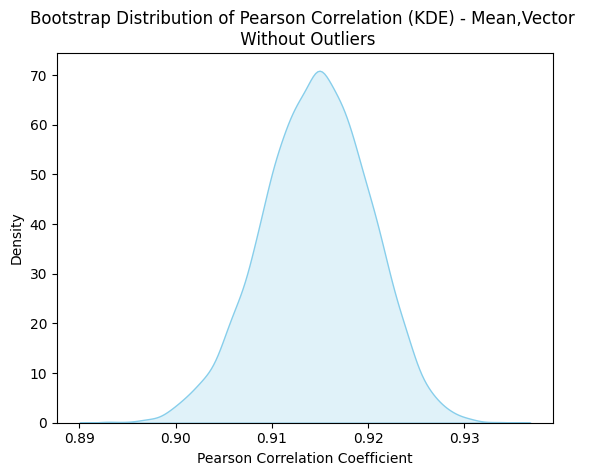

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_mean_vector.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Mean,Vector \n Without Outliers')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import bootstrap

res_vector_mean= pair_bootstrap(arr_vector,arr_mean)

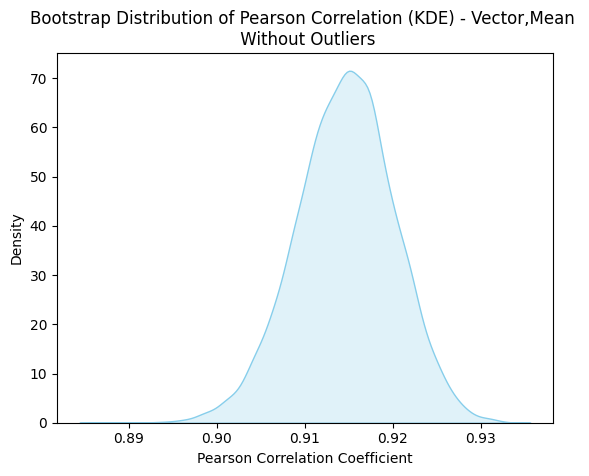

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_vector_mean.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Vector,Mean \n Without Outliers')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


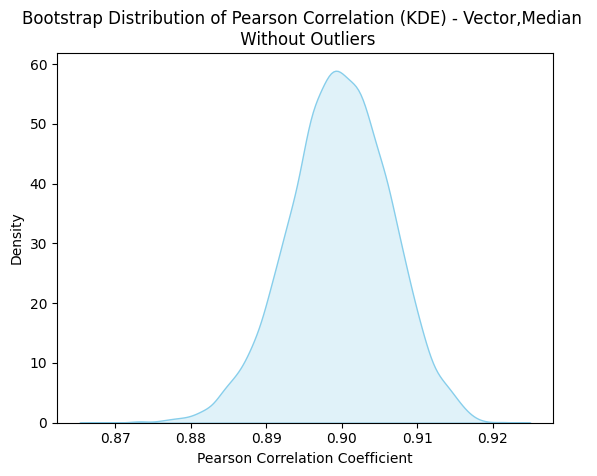

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_vector_median.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Vector,Median \n Without Outliers')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()


In [ ]:
from scipy.stats import bootstrap

res_median_vector= pair_bootstrap(arr_median,arr_vector)

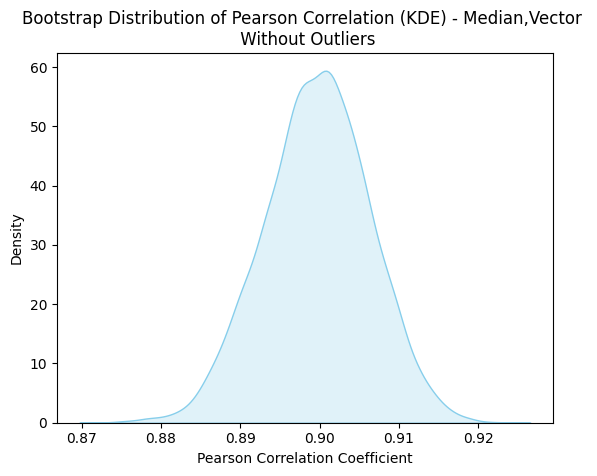

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot
sns.kdeplot(res_median_vector.bootstrap_distribution, fill=True, color='skyblue')
plt.title('Bootstrap Distribution of Pearson Correlation (KDE) - Median,Vector \n Without Outliers')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Density')
plt.show()
